In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

### Load Dataset

In [24]:
df = pd.read_csv("../FireDataset.csv", na_filter=True, keep_default_na=False, na_values=[''])

### Data Inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diravg        10150 non-null  object 
 1   dirmax        10150 non-null  object 
 2   humidcurr     10150 non-null  float64
 3   humidmin      10150 non-null  float64
 4   humidrel      10150 non-null  float64
 5   ocurcause     10150 non-null  object 
 6   rainamount    10150 non-null  float64
 7   raindays      10150 non-null  int64  
 8   riskavg       10150 non-null  float64
 9   riskmax       10150 non-null  float64
 10  tempavg       10150 non-null  float64
 11  windavg       10150 non-null  float64
 12  windmax       10150 non-null  float64
 13  within_5km    10150 non-null  float64
 14  within_10km   10150 non-null  float64
 15  within_30km   10150 non-null  float64
 16  height        10150 non-null  float64
 17  scale_damage  10150 non-null  float64
dtypes: float64(14), int64(1), 

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

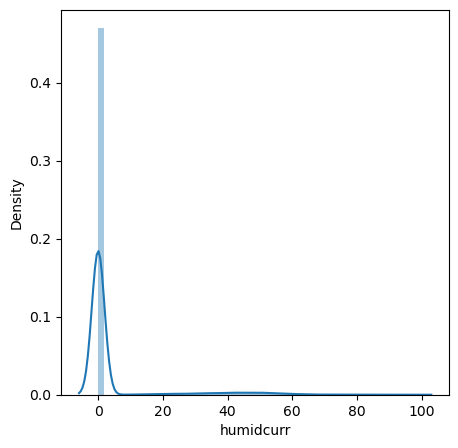

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


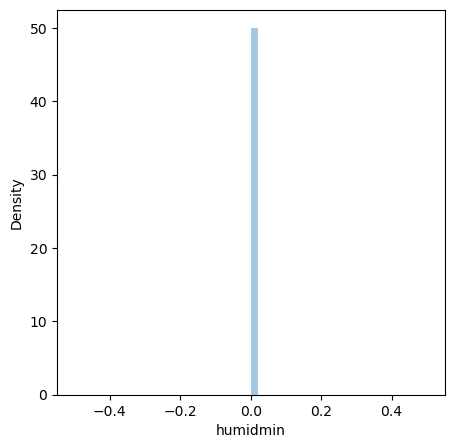

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


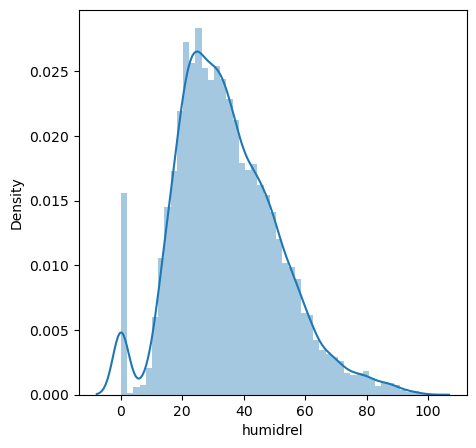

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 500x500 with 0 Axes>

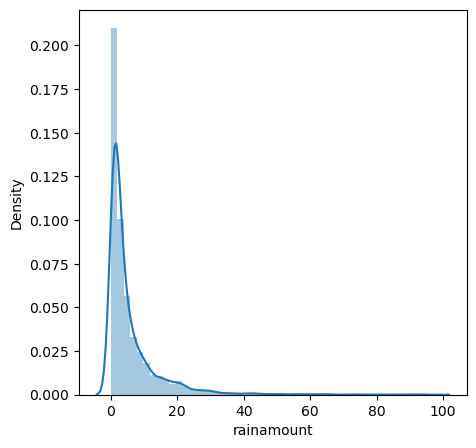

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


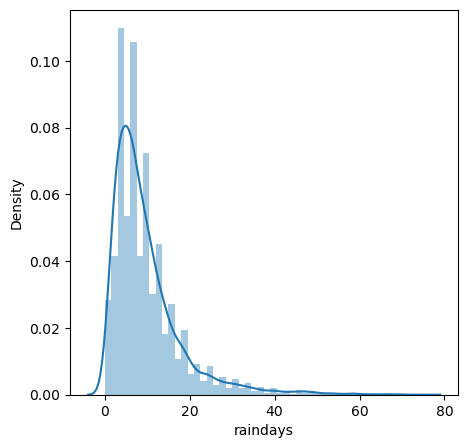

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


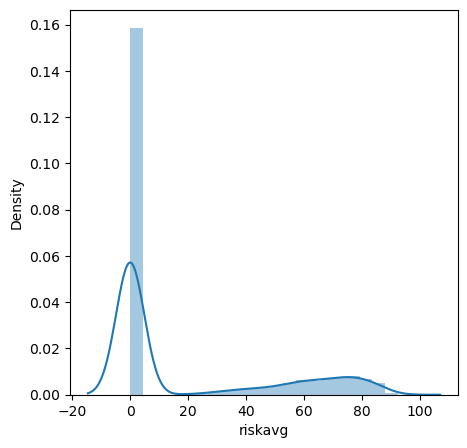

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


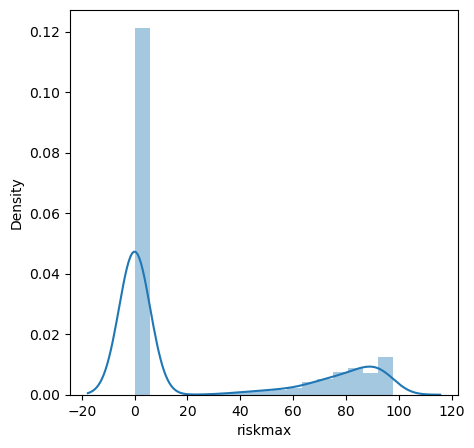

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


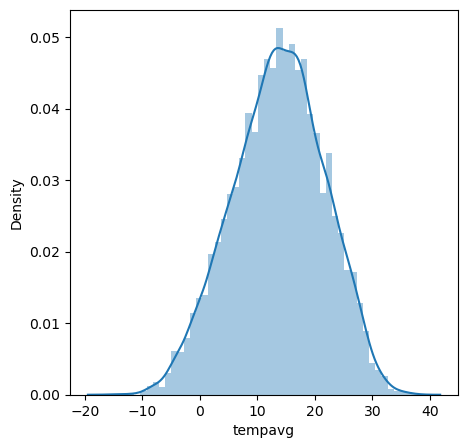

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


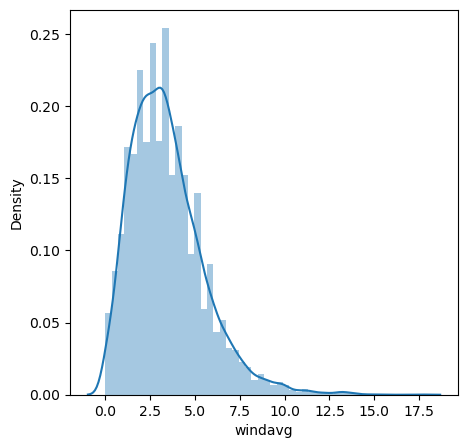

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


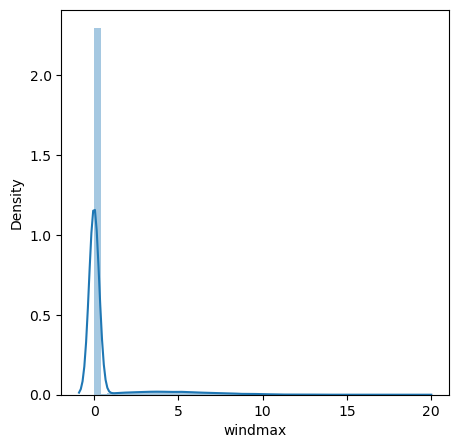

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


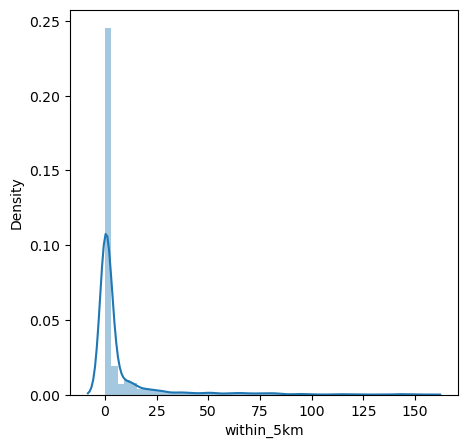

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


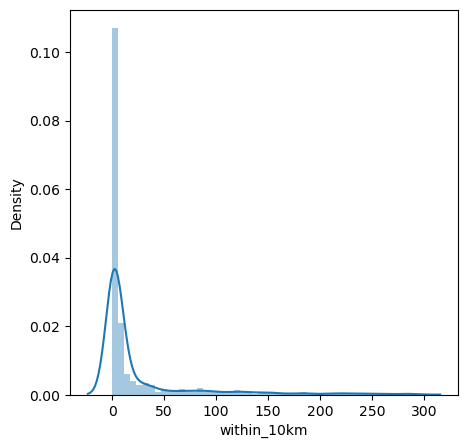

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


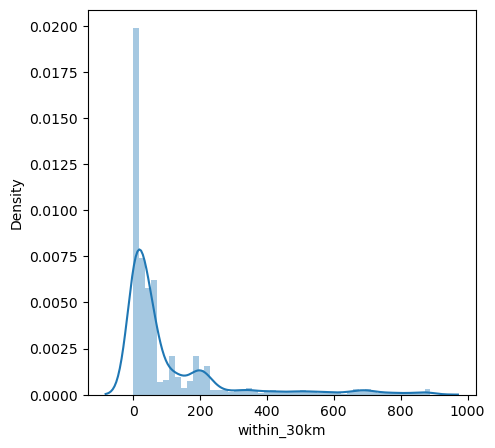

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


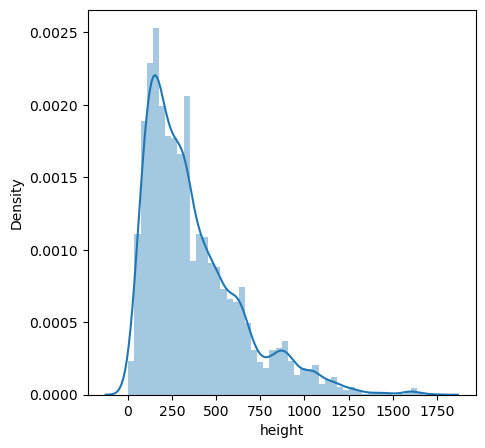

/Users/jeongmingyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


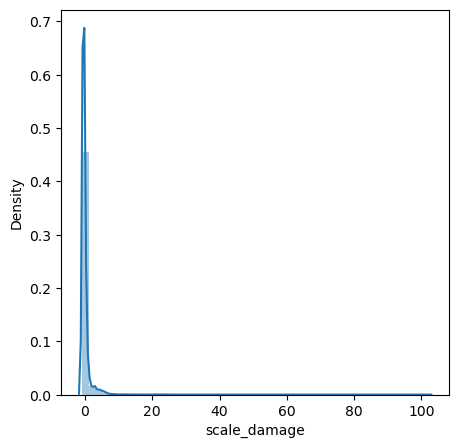

In [25]:
print(df.info())
print(df.head())
print(df.describe())
print(df.isna().sum())


print('dataset columns')
print(df.columns)
# columns distribution

for col in df.columns:
    try:
        plt.figure(figsize=(5, 5))
        sns.distplot(df[col])
        plt.show()
    except:
        plt.clf()

### Ocurcause Column, Check Unique

In [26]:
# print unique values count in 'ocurcause'
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.expand_frame_repr', True)
print(df['ocurcause'].value_counts())

입산자실화추정                 2322
입산자실화                   1612
쓰레기소각                    625
논밭두렁소각                   529
성묘객실화                    478
농산폐기물소각                  396
농산부산물소각                  327
담뱃불실화추정                  327
밭두렁소각                    325
논두렁소각                    276
어린이불장난                   216
담뱃불실화                    198
방화추정                     139
기타                       135
담배불실화추정                  113
어린이불장난추정                  97
성묘객실화추정                   88
입산자실화 추정                  86
군사훈련                      82
등산객실화추정                   72
담배불실화                     69
미상                        64
원인미상                      56
쓰레기소각추정                   55
정신이상자실화                   40
조사중                       36
등산객실화                     36
낙뢰                        29
주택화재비화                    27
방화                        27
산채채취자실화추정                 26
낚시꾼실화추정                   23
전기누전                      21
휴반소각                      20
무속행위          

### Correlation

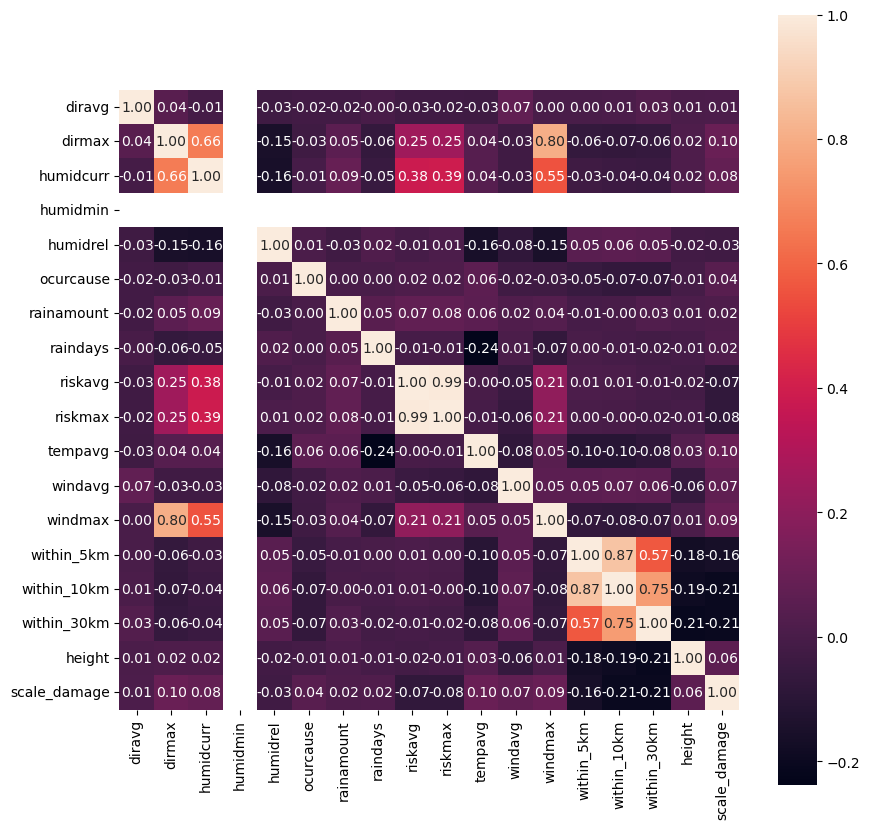

In [27]:
df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()

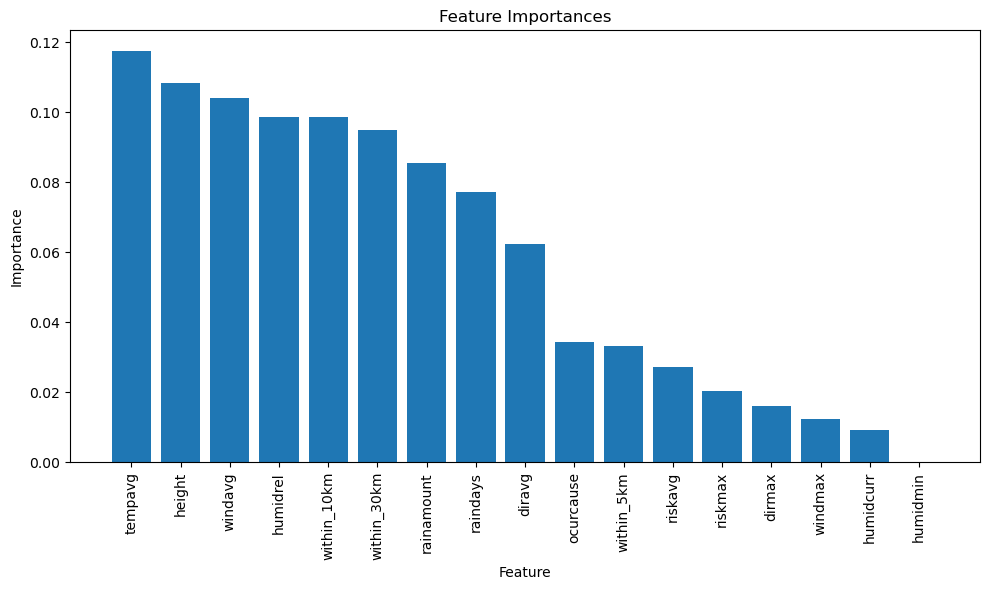

        Feature  Importance
10      tempavg    0.117541
16       height    0.108340
11      windavg    0.104157
4      humidrel    0.098602
14  within_10km    0.098595
15  within_30km    0.094893
6    rainamount    0.085639
7      raindays    0.077225
0        diravg    0.062264
5     ocurcause    0.034295
13   within_5km    0.033332
8       riskavg    0.027079
9       riskmax    0.020216
1        dirmax    0.016115
12      windmax    0.012479
2     humidcurr    0.009228
3      humidmin    0.000000


In [28]:
# Separate the features (X) and the target variable (y)
X = df.drop('scale_damage', axis=1)  # Exclude the target variable
y = df['scale_damage']  # Target variable

# Create a Random Forest regressor model and fit the data
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Print the feature importance in descending order
print(importance_df.sort_values(by='Importance', ascending=False))

[0.08241391 0.01300167 0.00840889 0.         0.09117977 0.04884747
 0.08793987 0.08794649 0.02623252 0.024438   0.09582924 0.09371222
 0.01244222 0.05939976 0.082274   0.09424461 0.09168937]


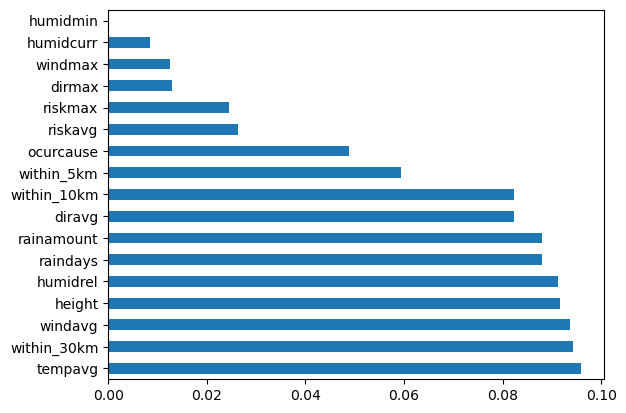

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv("../preprocessed.csv", encoding='utf-8')
X = data.drop('scale_damage', axis=1)
y = data['scale_damage'] #target column, i.e., price range

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(50).plot(kind='barh')

plt.show()

In [31]:
data = pd.read_csv("../preprocessed.csv", encoding='utf-8')
X = data.drop('scale_damage', axis=1)
y = data['scale_damage'] #target column, i.e., price range

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Input X must be non-negative.